# Installation of required library

In [37]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Extraction

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

# This dataset is in Kaggle format.
dftrain = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
print("Data Info:")
dftrain.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
print("\nDescriptive Statistics:")
print(dftrain.describe())


Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# Data Transformation or Data Preprocessing

In [46]:
print("\nMissing Values:\n")
print(dftrain.isnull().sum())


Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


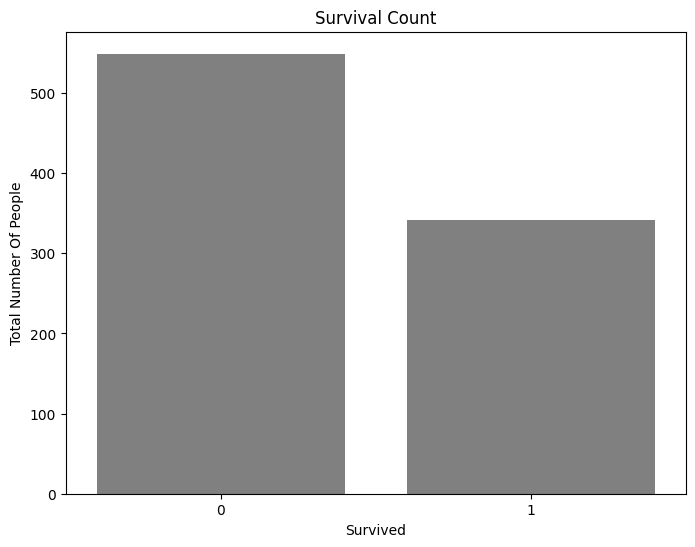

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=dftrain, color='grey')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Total Number Of People')
plt.show()

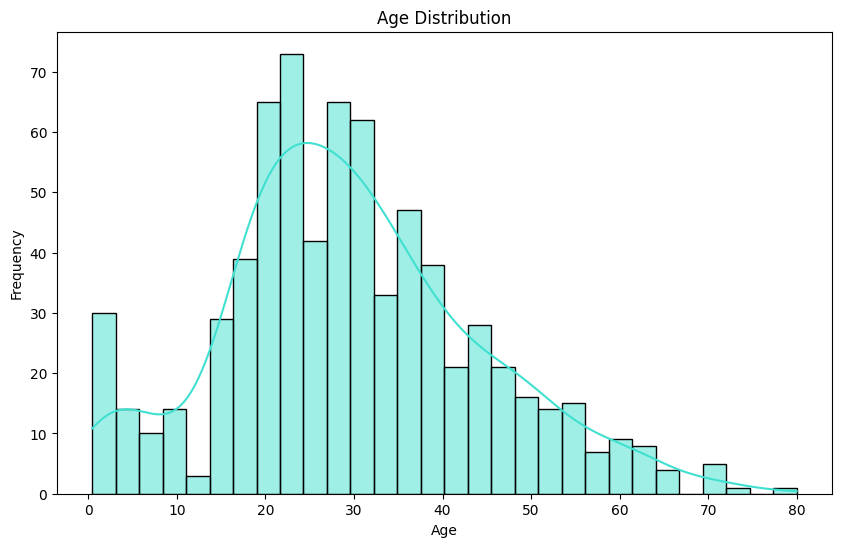

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(dftrain['Age'], bins=30, kde=True, color='turquoise')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

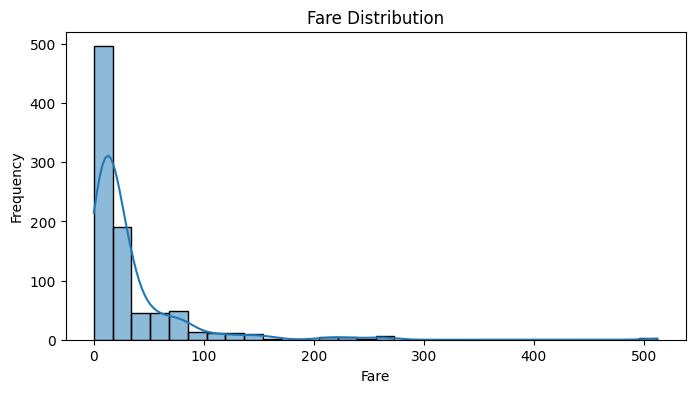

In [49]:
plt.figure(figsize=(8,4))
sns.histplot(dftrain['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

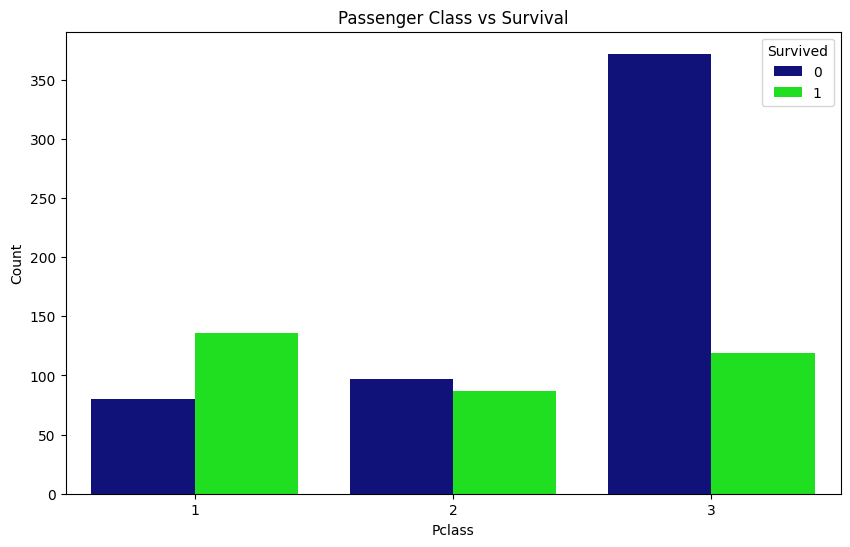

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Survived', data=dftrain, palette=['darkblue', 'lime'])
plt.title('Passenger Class vs Survival')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

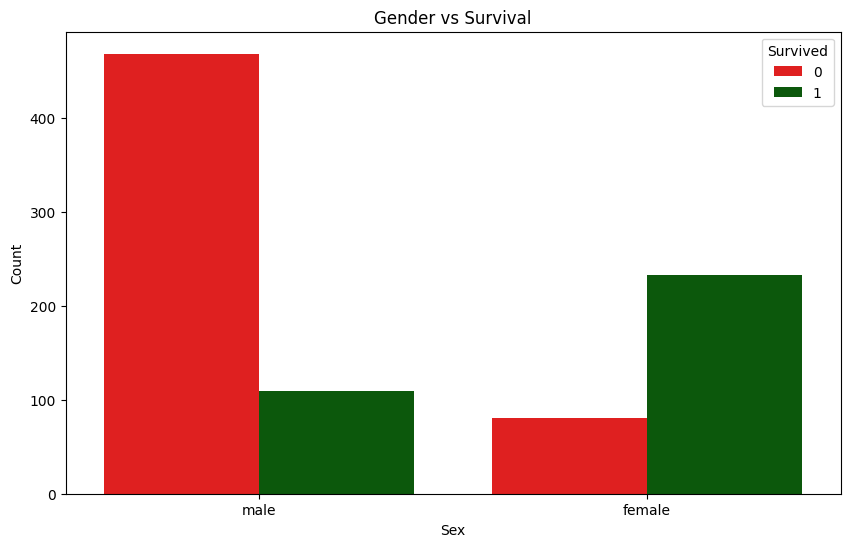

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=dftrain, palette=['red', 'darkgreen'])
plt.title('Gender vs Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# After analyzing this information of the plots, I noticed the following points:


• The majority of passengers are in their 20's and 30's

• The majority of passengers are male

• The majority of Passengers are in “Third” class

• Females have a much higher chance of survival

• Numbers of low fare people is higher

In [52]:
dftrain['Survived'] = dftrain['Survived'].astype(int)

In [53]:
df = dftrain.copy()

In [54]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [55]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [56]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')

In [57]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\dhule\AppData\Local\Temp\ipykernel_14796\1423775592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\dhule\AppData\Local\Temp\ipykernel_14796\1423775592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [58]:
for col in ['Sex', 'Embarked', 'Deck']:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [59]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Deck
0,0,3,1,22.0,1,0,7.2500,2,2,0,8
1,1,1,0,38.0,1,0,71.2833,0,2,0,2
2,1,3,0,26.0,0,0,7.9250,2,1,1,8
3,1,1,0,35.0,1,0,53.1000,2,2,0,2
4,0,3,1,35.0,0,0,8.0500,2,1,1,8


In [61]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Deck
886,0,2,1,27.0,0,0,13.00,2,1,1,8
887,1,1,0,19.0,0,0,30.00,2,1,1,1
888,0,3,0,28.0,1,2,23.45,2,4,0,8
889,1,1,1,26.0,0,0,30.00,0,1,1,2
890,0,3,1,32.0,0,0,7.75,1,1,1,8


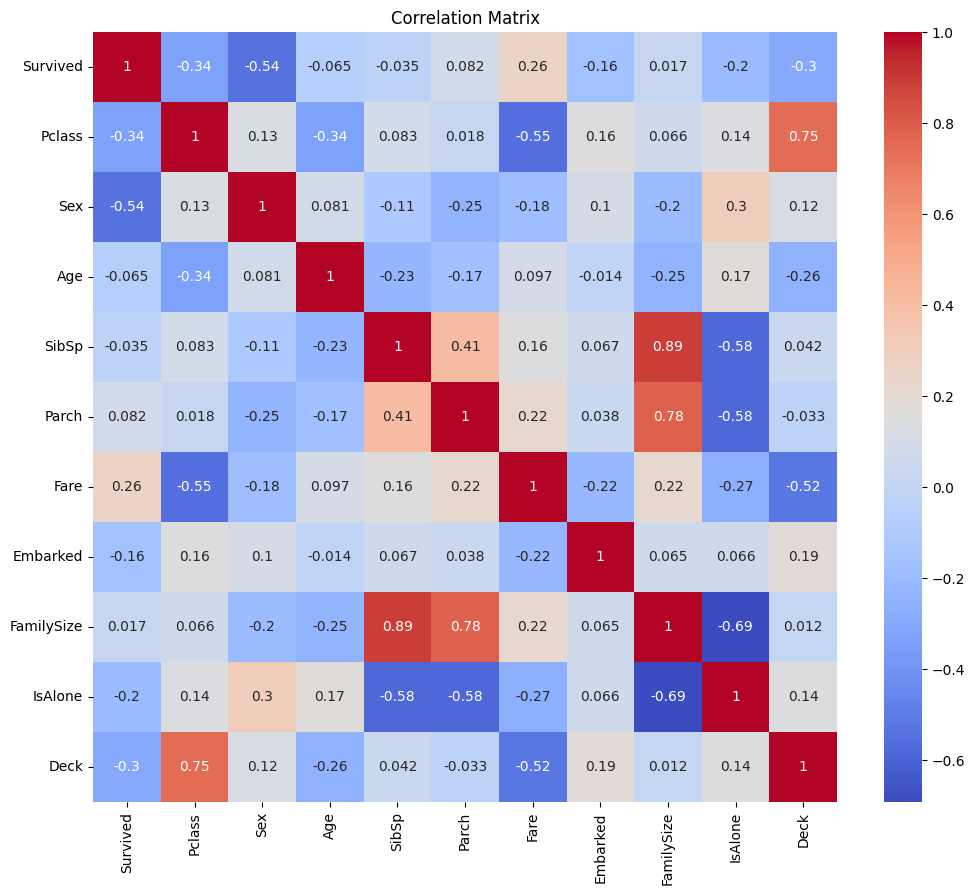

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [63]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)

Training features shape: (712, 10)
Validation features shape: (179, 10)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform both train and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

print("Standardization complete. Scaled training data preview:")
print(X_train_scaled.head())

Standardization complete. Scaled training data preview:
       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked  \
331 -1.614136  0.724310  1.253641 -0.470722 -0.479342 -0.078684  0.557444   
733 -0.400551  0.724310 -0.477284 -0.470722 -0.479342 -0.377145  0.557444   
382  0.813034  0.724310  0.215086 -0.470722 -0.479342 -0.474867  0.557444   
704  0.813034  0.724310 -0.246494  0.379923 -0.479342 -0.476230  0.557444   
813  0.813034 -1.380624 -1.785093  2.931860  2.048742 -0.025249  0.557444   

     FamilySize   IsAlone      Deck  
331   -0.554666  0.812203 -1.946137  
733   -0.554666  0.812203  0.513596  
382   -0.554666  0.812203  0.513596  
704    0.040096 -1.231219  0.513596  
813    3.013909 -1.231219  0.513596  


In [65]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
dftrain.shape

(891, 12)

In [67]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Deck
331,1,1,45.5,0,0,28.5000,2,1,1,2
733,2,1,23.0,0,0,13.0000,2,1,1,8
382,3,1,32.0,0,0,7.9250,2,1,1,8
704,3,1,26.0,1,0,7.8542,2,2,0,8
813,3,0,6.0,4,2,31.2750,2,7,0,8
...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2,1,1,8
270,1,1,28.0,0,0,31.0000,2,1,1,8
860,3,1,41.0,2,0,14.1083,2,3,0,8
435,1,0,14.0,1,2,120.0000,2,4,0,1


In [68]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int32

# Training the LightGBM Model with estimators and early stopping

In [69]:
import lightgbm as lgb
from lightgbm.callback import early_stopping

lgbm_model = lgb.LGBMClassifier(n_estimators=1000, random_state=42)
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  
    eval_metric='logloss',  
    callbacks=[early_stopping(stopping_rounds=50)],  # Stop if no improvement in 50 rounds
)

y_pred = lgbm_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

# Inference

In [70]:
from sklearn.metrics import precision_score, recall_score


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"Precision: {precision:.4f}\n")
print(f"Recall: {recall:.4f}")

Precision: 0.8154

Recall: 0.7162


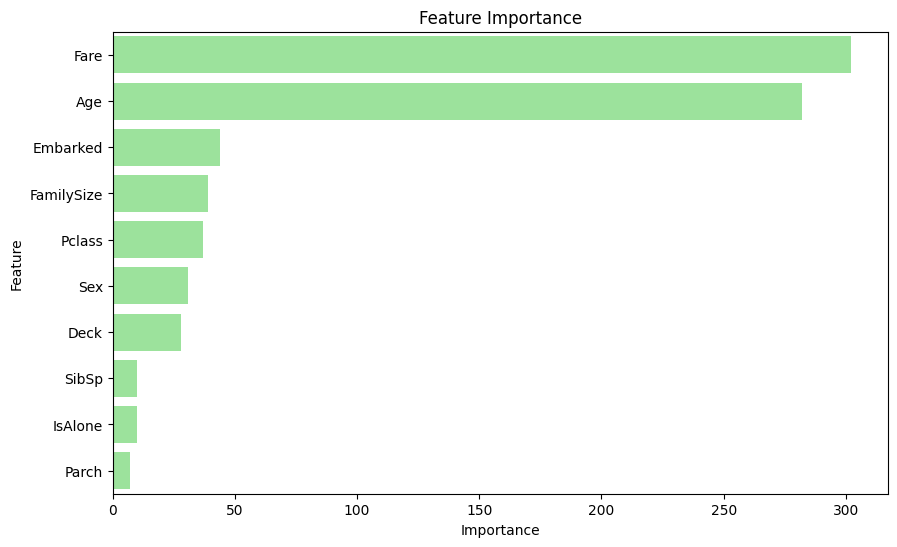


Feature Importance:
       Feature  Importance
5        Fare         302
2         Age         282
6    Embarked          44
7  FamilySize          39
0      Pclass          37
1         Sex          31
9        Deck          28
3       SibSp          10
8     IsAlone          10
4       Parch           7


In [71]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, color='lightgreen')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\nFeature Importance:\n", feature_importance)

In [72]:
import joblib
joblib.dump(lgbm_model, "lgbm_model.joblib")  
joblib.dump(scaler, "scaler.joblib")  # If using a scaler

['scaler.joblib']